# Free Trial Screener Project 
### AB Test in Python - Final Project for Udacity A/B Testing Course 

In [21]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

## Executive Summary
### Objective

The objective of this A/B test was to evaluate the impact of an additional step in the Udacity course enrollment process, where students are asked about their available time commitment before starting a free trial. The goal was to determine whether this intervention could set clearer expectations for students, thereby reducing the number of students who cancel the free trial due to insufficient time, without significantly affecting the overall course completion rates.

### Key Results 

A practically significant decrease in Gross Conversion was observed, indicating that fewer students enrolled in the course after implementing the filter. However, there was no significant difference in Net Conversion, meaning that the reduction in enrollments did not lead to an increase in the number of students who stayed beyond the 14-day free trial period to trigger payment.

### Recommendations 
The free trial screener is not recommended given that it did not achieve the goal of increasing the number of students who become paid
users. 

## Background and Objective
### Context
At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.

In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. This screenshot shows what the experiment looks like.

The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.

The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.


### Hypothesis 

The hypothesis was that by introducing a time commitment question during the enrollment process, students would have a clearer understanding of the time required to succeed in a Udacity course. This, in turn, would reduce the number of students who left the free trial due to insufficient time, while not significantly reducing the number of students who proceed beyond the free trial and eventually complete the course.

### Goals
* To reduce the number of students who cancel their free trial due to an underestimation of the time required for the course.
* To improve the overall student experience and better allocate coaching resources to students more likely to complete the course by setting clearer expectations for students upfront.

 ## Test Design and Methodology
 ### Available Data
 Data provided for the study:
 
* __Number of cookies__: That is, number of unique cookies to view the course overview page. (dmin=3000)
* __Number of user-ids__: That is, number of users who enroll in the free trial. (dmin=50)
* __Number of clicks__: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)
* __Click-through-probability__: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
* __Gross conversion__: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
* __Retention__: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
* __Net conversion__: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)


The practical significance boundary for each metric, that is, the difference that would have to be observed before that was a meaningful change for the business, is given in parentheses. All practical significance boundaries are given as absolute changes.

Any place "unique cookies" are mentioned, the uniqueness is determined by day. (That is, the same cookie visiting on different days would be counted twice.) User-ids are automatically unique since the site does not allow the same user-id to enroll twice.


 

Udacity has provided estimates of baseline values, offering an understanding of how these metrics behave prior to the study: 

* **Unique cookies to view course overview page per day:** 40000
* **Unique cookies to click "Start free trial" per day:** 3200
* **Enrollments per day:** 660
* **Click-through-probability on "Start free trial":** 0.08
* **Probability of enrolling, given click:** 0.20625
* **Probability of payment, given enroll:** 0.53
* **Probability of payment, given click:** 0.1093125


 ### Metric Choice 
 
 Based on the provided data, we can pick our evaluation metrics and invariate metrics. 
 
* __Invariate Metrics__: We will choose metrics that we don't expect to change across our experiment and control groups. We will do "sanity checks" on these metrics to make sure that our experiment was run properly and ensure that any observed differences in the evaluation metrics are not due to external factors or changes in traffic patterns.

* __Evaluation Metrics__: These are the metrics we are most interested about, and tells us about differences that may occur between the experiment and control groups. We will use the 'd min'(practical significance boundary), the minimum change which is practically significant to the business, to help us determine when metrics are not only statistically signifiant but also practically significant to the business.

#### Invariate Metrics

 
* __Number of cookies__: This metric represents the total number of unique visitors (cookies) who viewed the course overview page. Since it reflects overall traffic to the page, we do not expect this number to differ between the control and experiment groups.
* __Number of clicks__: This metric counts the number of unique cookies that clicked the "Start free trial" button before the free trial screener is triggered. Since this is an action taken before the experiment’s intervention, we don't anticipate a difference between the control and experiment groups.
* __Click-through-probability__: This metric is the ratio of unique cookies that clicked the "Start free trial" button to the number of unique cookies that viewed the course overview page. Since it's a measure of initial interest in the free trial, which occurs before the experiment's treatment, it should remain invariant across the experiment and control groups. It acts as a sanity check to confirm that user interest in the free trial is consistent.

#### Evaluation Metrics
* __Gross conversion__:  Gross conversion is defined as the number of user-ids that complete the checkout process and enroll in the free trial, divided by the number of unique cookies that clicked the "Start free trial" button. This metric helps access whether the intervention impacts the amount of users that enroll in the free trial. 

* __Retention__: Retention measures the proportion of user-ids that remain enrolled after the 14-day trial period, indicating a successful transition from free trial to paying customer. This metric directly reflects the effectiveness of the new intervention in converting trials to enrollments. 
* __Net conversion__: Net conversion is the proportion of unique cookies that click the "Start free trial" button and then remain enrolled after the 14-day trial period, becoming paying customers. This metric captures the overall effectiveness of the funnel from interest (click) to conversion (payment), taking into account both the initial enrollment decision and the subsequent retention. It helps determine the overall effect of the intervention on long-term commitment.

 ### Measuring Variability
 
In order to determine our sample size, design our experiment, and analyze the data to assess statistical significance, we need to estimate the standard deviation.


We can assume the metrics to be binomically distributed with a probability of p hat and use the formula for the standard deviation of a binomial proportion to analytically estimate the standard deviation: 

$$
\sigma = \sqrt{\frac{\hat{p} \cdot (1 - \hat{p})}{n}}
$$


where:
* p hat is the probability of success (e.g., the conversion rate).
* n is the sample size (e.g., the number of trials or observations).


__Keep in mind:__

The assumption that a metric is binomially distributed and that we can use the standard binomial formula for variance is only valid when the unit of diversion is the same as the unit of analysis. This is because, in such cases, each "trial" in the experiment is independent and identically distributed, which is a key assumption of the binomial distribution.


__Unit of Diversion__: This refers to the unit at which the experiment is randomized or "diverted" into different groups (e.g., unique cookies in your case).

__Unit of Analysis__: This refers to the unit used in the metric's denominator (e.g., number of unique cookies, number of clicks, etc.).

In cases where the unit of diversion and unit of analysis differ, it’s advisable to estimate the variance empirically rather than relying solely on the analytic (binomial) estimate. 


In [22]:
def standard_d (p, n, round_d = 4):
    return round(np.sqrt(p * (1 - p)/n),round_d)

In [23]:
baseline = {"Cookies":40000,
            "Clicks":3200,
            "Enrollments":660,
            "CTP":0.08,
            "GConversion":0.20625,
            "Retention":0.53,
            "NConversion":0.109313}

Scaling the baseline estimates of count metrics with the sample size we specified, from 40000 unique cookies to visit the course overview page per day, to 5000.

In [24]:
#Scale The counts estimates
baseline["Cookies"] = 5000
baseline["Clicks"]=baseline["Clicks"]*(5000/40000)
baseline["Enrollments"]=baseline["Enrollments"]*(5000/40000)
baseline

{'Cookies': 5000,
 'Clicks': 400.0,
 'Enrollments': 82.5,
 'CTP': 0.08,
 'GConversion': 0.20625,
 'Retention': 0.53,
 'NConversion': 0.109313}

In [25]:
# Gross Conversion SD 
GC={}
GC["d_min"]=0.01
GC["p"]=baseline["GConversion"]
GC["n"]=baseline["Clicks"]
GC["sd"] = standard_d(GC["p"], GC["n"], round_d = 4)
GC["sd"]

0.0202

In [26]:
# Retention SD
Rt={}
Rt["d_min"]=0.01
Rt["p"]=baseline["Retention"]
Rt["n"]=baseline["Enrollments"]
Rt["sd"]=standard_d(Rt["p"], Rt["n"], round_d = 4)
Rt["sd"]

0.0549

* Among our three evaluation metrics, retention is the metric where the unit of diversion is not the same as the unit of analysis. Therefore, we would want to collect an empirical estimate of the variability if we had time. 

In [27]:
#Net Conversion SD
NC={}
NC["d_min"]=0.0075
NC["p"]=baseline["NConversion"]
NC["n"]=baseline["Clicks"]
NC["sd"]=standard_d(NC["p"], NC["n"], round_d = 4)
NC["sd"]

0.0156

## Sizing 

To ensure our experiment has sufficient statistical power and significance, we need to estimate the minimum number of samples required.

Given a significance level (α) of 0.05 and desired power (1−β) of 0.8, we can calculate the total number of pageviews (i.e., unique cookies viewing the course overview page) needed for the experiment. This total will be split between the control and experimental groups. We can perform this calculation using an online calculator or by applying the appropriate formula directly.

Online Calculator:

https://www.evanmiller.org/ab-testing/sample-size.html

#### Calculations

In [28]:

def get_z_score(alpha):
    return norm.ppf(alpha)

def get_sds(p,d):
    sd1 = np.sqrt(p * (1-p) + p * (1-p))
    sd2 = np.sqrt(p *(1-p) + (p + d)* (1-(p+d)))
    sds = [sd1, sd2]
    return sds

def get_sampSize(sds,alpha,beta,d):
    n = pow ((get_z_score(1 - alpha / 2) * sds[0] + get_z_score (1 - beta) * sds[1]),2) / pow(d,2)
    return n

In [29]:
GC["SampSize"]=round(get_sampSize(get_sds(GC["p"],GC["d_min"]),0.05,0.2,GC["d_min"]))
# pageview for two groups
GC["SampSize_total"]=round(GC["SampSize"]/ 0.08 *2)
GC["SampSize_total"]

645875

In [30]:
# Getting an integer value 
Rt["SampSize"]=round(get_sampSize(get_sds(Rt["p"],Rt["d_min"]),0.05,0.2,Rt["d_min"]))
Rt["SampSize"]
# convert enrollment per group to the total number of clicks and to page views
Rt["SampSize_total"] = round(Rt["SampSize"] / 0.20625 / 0.08 * 2)
Rt["SampSize_total"]

4737818

In [31]:
NC["SampSize"]=round(get_sampSize(get_sds(NC["p"],NC["d_min"]),0.05,0.2,NC["d_min"]))
NC["SampSize_total"] = NC["SampSize"] * 2 / (3200/40000)
NC["SampSize_total"]

685325.0

### Final Choice 
When designing experiments, we must be mindful of the duration and exposure. Given that we receive approximately 40,000 pageviews per day, obtaining over 4 million pageviews for this experiment is not feasible.

Therefore, we will exclude Retention from our analysis and focuse solely on Gross Conversion and Net Conversion for this experiment. After evaluating the results, we may consider conducting a follow-up experiment to assess Retention if needed. 

For now, the required number of pageviews is down to 685,325. With 100% diversion, the experiment will take about 18 days. Considering the potential for other simultaneous experiments, we may opt for a 70% diversion, which would extend the experiment duration to approximately 25 days. 



 ## Data Analysis

### Importing Data 

In [32]:
experiment = pd.read_csv("./Experiment.csv")
control = pd.read_csv("./Control.csv")
experiment.head()
control.head()
experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


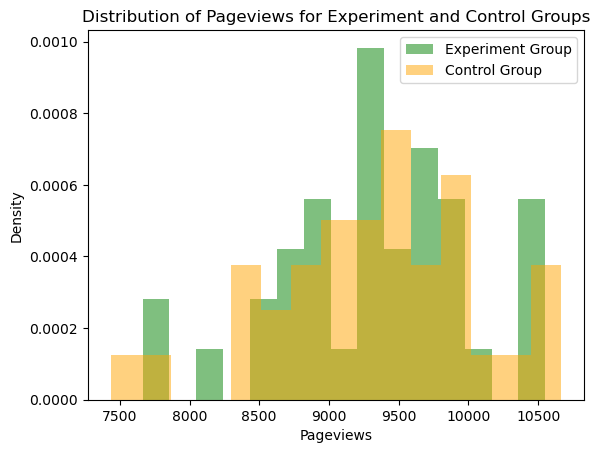

In [33]:
plt.hist(x = experiment.Pageviews,
         bins = 15,
         density = 1,
         facecolor = 'green',
         alpha = 0.5,
         label='Experiment Group')
plt.hist(x = control.Pageviews,
         bins = 15,
         density = 1,
         facecolor = 'orange',
         alpha = 0.5,
         label='Control Group')

plt.title('Distribution of Pageviews for Experiment and Control Groups')
plt.xlabel('Pageviews')
plt.ylabel('Density')
plt.legend()  # Adds a legend to differentiate the two groups
plt.show()

### Sanity Checks


__The 3 Invariate Metrics we had choosen for our Sanity Checks:__

 
* __Number of cookies__: This metric represents the total number of unique visitors (cookies) who viewed the course overview page. Since it reflects overall traffic to the page, we do not expect this number to differ between the control and experiment groups.
* __Number of clicks__: This metric counts the number of unique cookies that clicked the "Start free trial" button before the free trial screener is triggered. Since this is an action taken before the experiment’s intervention, we don't anticipate a difference between the control and experiment groups.
* __Click-through-probability__: This metric is the ratio of unique cookies that clicked the "Start free trial" button to the number of unique cookies that viewed the course overview page. Since it's a measure of initial interest in the free trial, which occurs before the experiment's treatment, it should remain invariant across the experiment and control groups. It acts as a sanity check to confirm that user interest in the free trial is consistent.

In [43]:
control_total_page = control.Pageviews.sum()
experiment_total_page = experiment.Pageviews.sum()
page_total = control_total_page + experiment_total_page
print("number of pageviews in the control group :", control_total_page)
print("number of Pageviews in the experiment group :" , experiment_total_page )
print("number of pageviews in total :", page_total) # total
# calculate the confidence interval 
p=0.5
alpha=0.05
p_hat=round(control_total_page/(page_total),4)
sd = np.sqrt(p * (1-p)/ (page_total))
ME=round(get_z_score(1-(alpha/2))*sd,4)
print ("The confidence interval is between",p-ME,"and",p+ME,"p_hat is ",p_hat)

number of pageviews in the control group : 345543
number of Pageviews in the experiment group : 344660
number of pageviews in total : 690203
The confidence interval is between 0.4988 and 0.5012 p_hat is  0.5006


In [36]:
control_total_clicks = control.Clicks.sum()
experiment_total_clicks = experiment.Clicks.sum()
clicks_total = control_total_clicks + experiment_total_clicks

p_hat=round(control_total_clicks / clicks_total,4)
sd= np.sqrt(p*(1-p)/clicks_total)
ME=round(get_z_score(1-(alpha/2))*sd,4)
print ("The confidence interval is between",p-ME,"and",p+ME,"and p_hat is",p_hat)

The confidence interval is between 0.4959 and 0.5041 and p_hat is 0.5005


In [37]:
control_ctp = control_total_clicks / control_total_page
experiment_ctp = experiment_total_clicks / experiment_total_page
d_hat = round(experiment_ctp - control_ctp,4)
p_pooled = clicks_total / page_total
sd_pooled = np.sqrt(p_pooled * (1 - p_pooled * (1 / control_total_page + 1 / experiment_total_page)))
ME=round(get_z_score(1-(alpha/2))*sd_pooled,4)
print ("The confidence interval is between",0-ME,"and",0+ME,"and d_hat is",d_hat)

The confidence interval is between -0.5618 and 0.5618 and d_hat is 0.0001


Three observed values fall within the confidence interval and thus all passed the sanity check.

### Effect Size 

In [38]:
# Count the total clicks from complete records only 
clicks_cont=control["Clicks"].loc[control["Enrollments"].notnull()].sum()
clicks_exp=experiment["Clicks"].loc[experiment["Enrollments"].notnull()].sum()

#Gross Conversion - number of enrollments divided by number of clicks
enrollments_cont=control["Enrollments"].sum()
enrollments_exp=experiment["Enrollments"].sum()

# Check difference between GC_cont and GC_exp groups
GC_cont=enrollments_cont/clicks_cont
GC_exp=enrollments_exp/clicks_exp
GC_pooled=(enrollments_cont + enrollments_exp)/(clicks_cont + clicks_exp)
GC_sd_pooled= np.sqrt(GC_pooled*(1-GC_pooled)*(1/clicks_cont+1/clicks_exp))
GC_ME=round(get_z_score(1-alpha/2)*GC_sd_pooled,4)
GC_diff=round(GC_exp - GC_cont, 4)
print("The change due to the experiment is",GC_diff)
print("Confidence Interval: [",GC_diff-GC_ME,",",GC_diff+GC_ME,"]")
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if",-GC["d_min"],"is not in the CI as well.")

The change due to the experiment is -0.0206
Confidence Interval: [ -0.0292 , -0.012 ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if -0.01 is not in the CI as well.


In [39]:
#Net Conversion - number of payments divided by number of clicks
payments_cont=control["Payments"].sum()
payments_exp=experiment["Payments"].sum()

NC_cont=payments_cont/clicks_cont
NC_exp=payments_exp/clicks_exp
NC_pooled=(payments_cont+payments_exp)/(clicks_cont+clicks_exp)
NC_sd_pooled=mt.sqrt(NC_pooled*(1-NC_pooled)*(1/clicks_cont+1/clicks_exp))
NC_ME=round(get_z_score(1-alpha/2)*NC_sd_pooled,4)
NC_diff=round(NC_exp-NC_cont,4)
print("The change due to the experiment is",NC_diff)
print("Confidence Interval: [",NC_diff-NC_ME,",",NC_diff+NC_ME,"]")
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if",NC["d_min"],"is not in the CI as well.")

The change due to the experiment is -0.0049
Confidence Interval: [ -0.0116 , 0.0018000000000000004 ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if 0.0075 is not in the CI as well.


In [40]:
# Prepare the dataset 
full = control.join(other=experiment, how = "inner", lsuffix= "_cont", rsuffix="_exp")
# full.head()
# filter the complete data records
full = full.loc[full["Enrollments_cont"].notnull()]
# full.count()
# assign the label=1 if experiment value is greater than the control vale 
cont_x = full["Enrollments_cont"] / full["Clicks_cont"]
cont_y = full["Enrollments_exp"] / full["Clicks_exp"]
full["GC"] = np.where(cont_x < cont_y, 1, 0)
# full.GC
# build a column for netconversion 
cont_a = full["Payments_cont"] / full["Clicks_cont"]
cont_b = full["Payments_exp"] / full["Clicks_exp"]
full["NC"] = np.where(cont_a < cont_b, 1, 0)
# calculate the count 
GC_1 = full.GC[full["GC"] == 1].count()
NC_1 = full.NC[full["NC"] == 1].count()
n = full.GC.count()
print("No. of cases for GC:",GC_1,'\n',
      "No. of cases for NC:",NC_1,'\n',
      "No. of total cases",n)

No. of cases for GC: 4 
 No. of cases for NC: 10 
 No. of total cases 23


### Sign Test

In [41]:
# build a funciton for binominal probability 
def get_prob(x,n):
    p= round(mt.factorial(n)/(mt.factorial(x)* mt.factorial(n-x))*0.5**x*0.5**(n-x),4)
    return p
#next a function to compute the pvalue from probabilities of maximum x
def get_2tail_pvalue(x,n):
    p = 0
    for i in range(0, x+1):
        p = p + get_prob (i, n)
    return 2 * p
        

In [42]:
GC_change = get_2tail_pvalue(GC_1, n)
print("GC Change :", GC_change)
NC_change = get_2tail_pvalue(NC_1, n)
print("NC Change :", NC_change)

GC Change : 0.0026000000000000003
NC Change : 0.6774


The change in Gross conversion was significant, while the change in Net conversion was not.

## Conclusion

Our analysis revealed a statistically and practically significant decrease in Gross Conversion, indicating that fewer students enrolled in the course after implementing the filter. However, we observed no significant difference in Net Conversion, meaning that the reduction in enrollments did not lead to an increase in the number of students who stayed beyond the 14-day free trial period to trigger payment.

Given these findings, it is clear that the experiment did not achieve its intended goal of increasing the fraction of paying users. The reduction in Gross Conversion without a corresponding increase in Net Conversion suggests that the filter discouraged potential students from enrolling without improving retention of those who did.

Based on these results, I recommend not launching this change. While it may have affected Gross Conversion, it did not have the desired impact on Net Conversion. 
